# 4.3 - Keşifsel Veri Analizi - Veri Temizliği 2: Kayıp Değerler
Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle [veri kümesini](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız. <br>

### Soru 1:
Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [445]:
education = pd.read_csv("states_all.csv")
# education.index.name = "Index"
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


#### Değişken tipleri:

In [446]:
education.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   PRIMARY_KEY                   object 
 1   STATE                         object 
 2   YEAR                          int64  
 3   ENROLL                        float64
 4   TOTAL_REVENUE                 float64
 5   FEDERAL_REVENUE               float64
 6   STATE_REVENUE                 float64
 7   LOCAL_REVENUE                 float64
 8   TOTAL_EXPENDITURE             float64
 9   INSTRUCTION_EXPENDITURE       float64
 10  SUPPORT_SERVICES_EXPENDITURE  float64
 11  OTHER_EXPENDITURE             float64
 12  CAPITAL_OUTLAY_EXPENDITURE    float64
 13  GRADES_PK_G                   float64
 14  GRADES_KG_G                   float64
 15  GRADES_4_G                    float64
 16  GRADES_8_G                    float64
 17  GRADES_12_G                   float64
 18  GRADES_1_8_G                

In [447]:
print("The \"null\" percentages of the columns:")
round(education.isnull().sum()*100 / education.shape[0], 2)

The "null" percentages of the columns:


PRIMARY_KEY                      0.00
STATE                            0.00
YEAR                             0.00
ENROLL                          28.63
TOTAL_REVENUE                   25.66
FEDERAL_REVENUE                 25.66
STATE_REVENUE                   25.66
LOCAL_REVENUE                   25.66
TOTAL_EXPENDITURE               25.66
INSTRUCTION_EXPENDITURE         25.66
SUPPORT_SERVICES_EXPENDITURE    25.66
OTHER_EXPENDITURE               28.63
CAPITAL_OUTLAY_EXPENDITURE      25.66
GRADES_PK_G                     10.09
GRADES_KG_G                      4.84
GRADES_4_G                       4.84
GRADES_8_G                       4.84
GRADES_12_G                      4.84
GRADES_1_8_G                    40.52
GRADES_9_12_G                   37.55
GRADES_ALL_G                     4.84
AVG_MATH_4_SCORE                67.06
AVG_MATH_8_SCORE                64.90
AVG_READING_4_SCORE             62.10
AVG_READING_8_SCORE             67.23
dtype: float64

### Soru 2:
Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

In [448]:
# Aşağıda görülebileceği üzere, bazı değişkenler yer yer NaN değerleri barındırmaktadır. 
education.iloc[45:55,:]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
45,1992_VERMONT,VERMONT,1992,NaN,812377.0,31757.0,204163.0,576457.0,800377.0,386699.0,...,8329.0,7227.0,5573.0,NaN,NaN,98558.0,NaN,NaN,NaN,NaN
46,1992_VIRGINIA,VIRGINIA,1992,NaN,5631293.0,313971.0,2180133.0,3137189.0,5744469.0,2982862.0,...,79821.0,76775.0,60854.0,NaN,NaN,1031925.0,221.0,268.0,221.0,NaN
47,1992_WASHINGTON,WASHINGTON,1992,NaN,4870832.0,263053.0,3467779.0,1140000.0,5360834.0,2587181.0,...,74098.0,67285.0,53986.0,NaN,NaN,896475.0,NaN,NaN,NaN,NaN
48,1992_WEST_VIRGINIA,WEST_VIRGINIA,1992,NaN,1585099.0,130117.0,1021803.0,433179.0,1587968.0,835186.0,...,23556.0,24791.0,21844.0,NaN,NaN,318296.0,215.0,259.0,216.0,NaN
49,1992_WISCONSIN,WISCONSIN,1992,NaN,4993909.0,217723.0,2205439.0,2570747.0,5181471.0,2914442.0,...,63365.0,60783.0,55543.0,NaN,NaN,829415.0,229.0,278.0,224.0,NaN
50,1992_WYOMING,WYOMING,1992,NaN,629748.0,31714.0,314216.0,283818.0,624941.0,339953.0,...,8049.0,8078.0,6613.0,NaN,NaN,100313.0,225.0,275.0,223.0,NaN
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,10156.0,9160.0,6975.0,NaN,NaN,125948.0,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,NaN,NaN,709453.0,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,NaN,NaN,444271.0,NaN,NaN,NaN,NaN


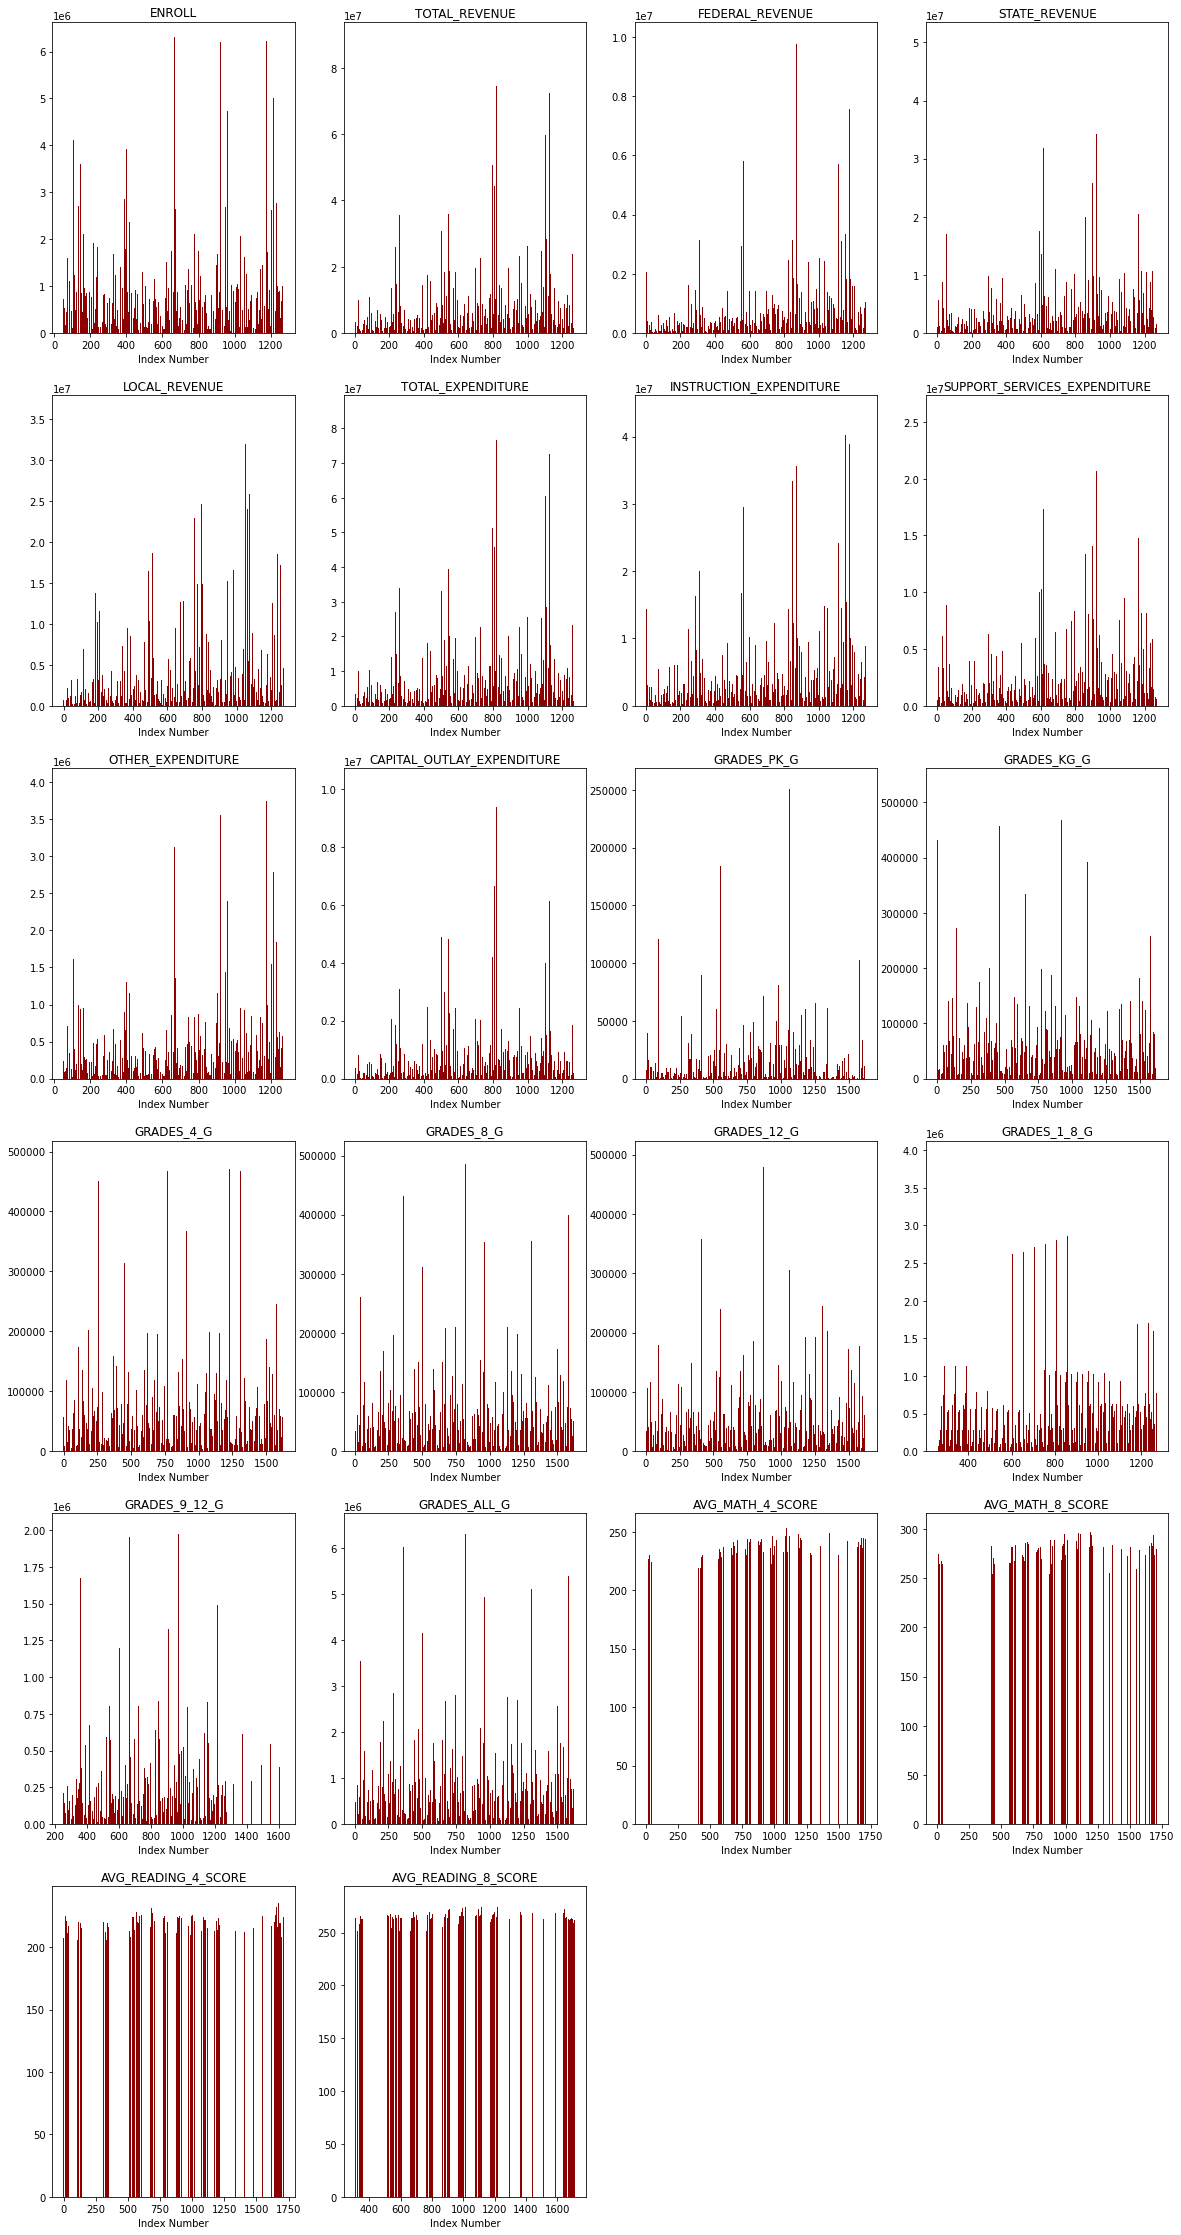

In [449]:
# Bar grafik
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.bar(x = education.index,
            height = education[education.columns[i]],
            color = "darkred")
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

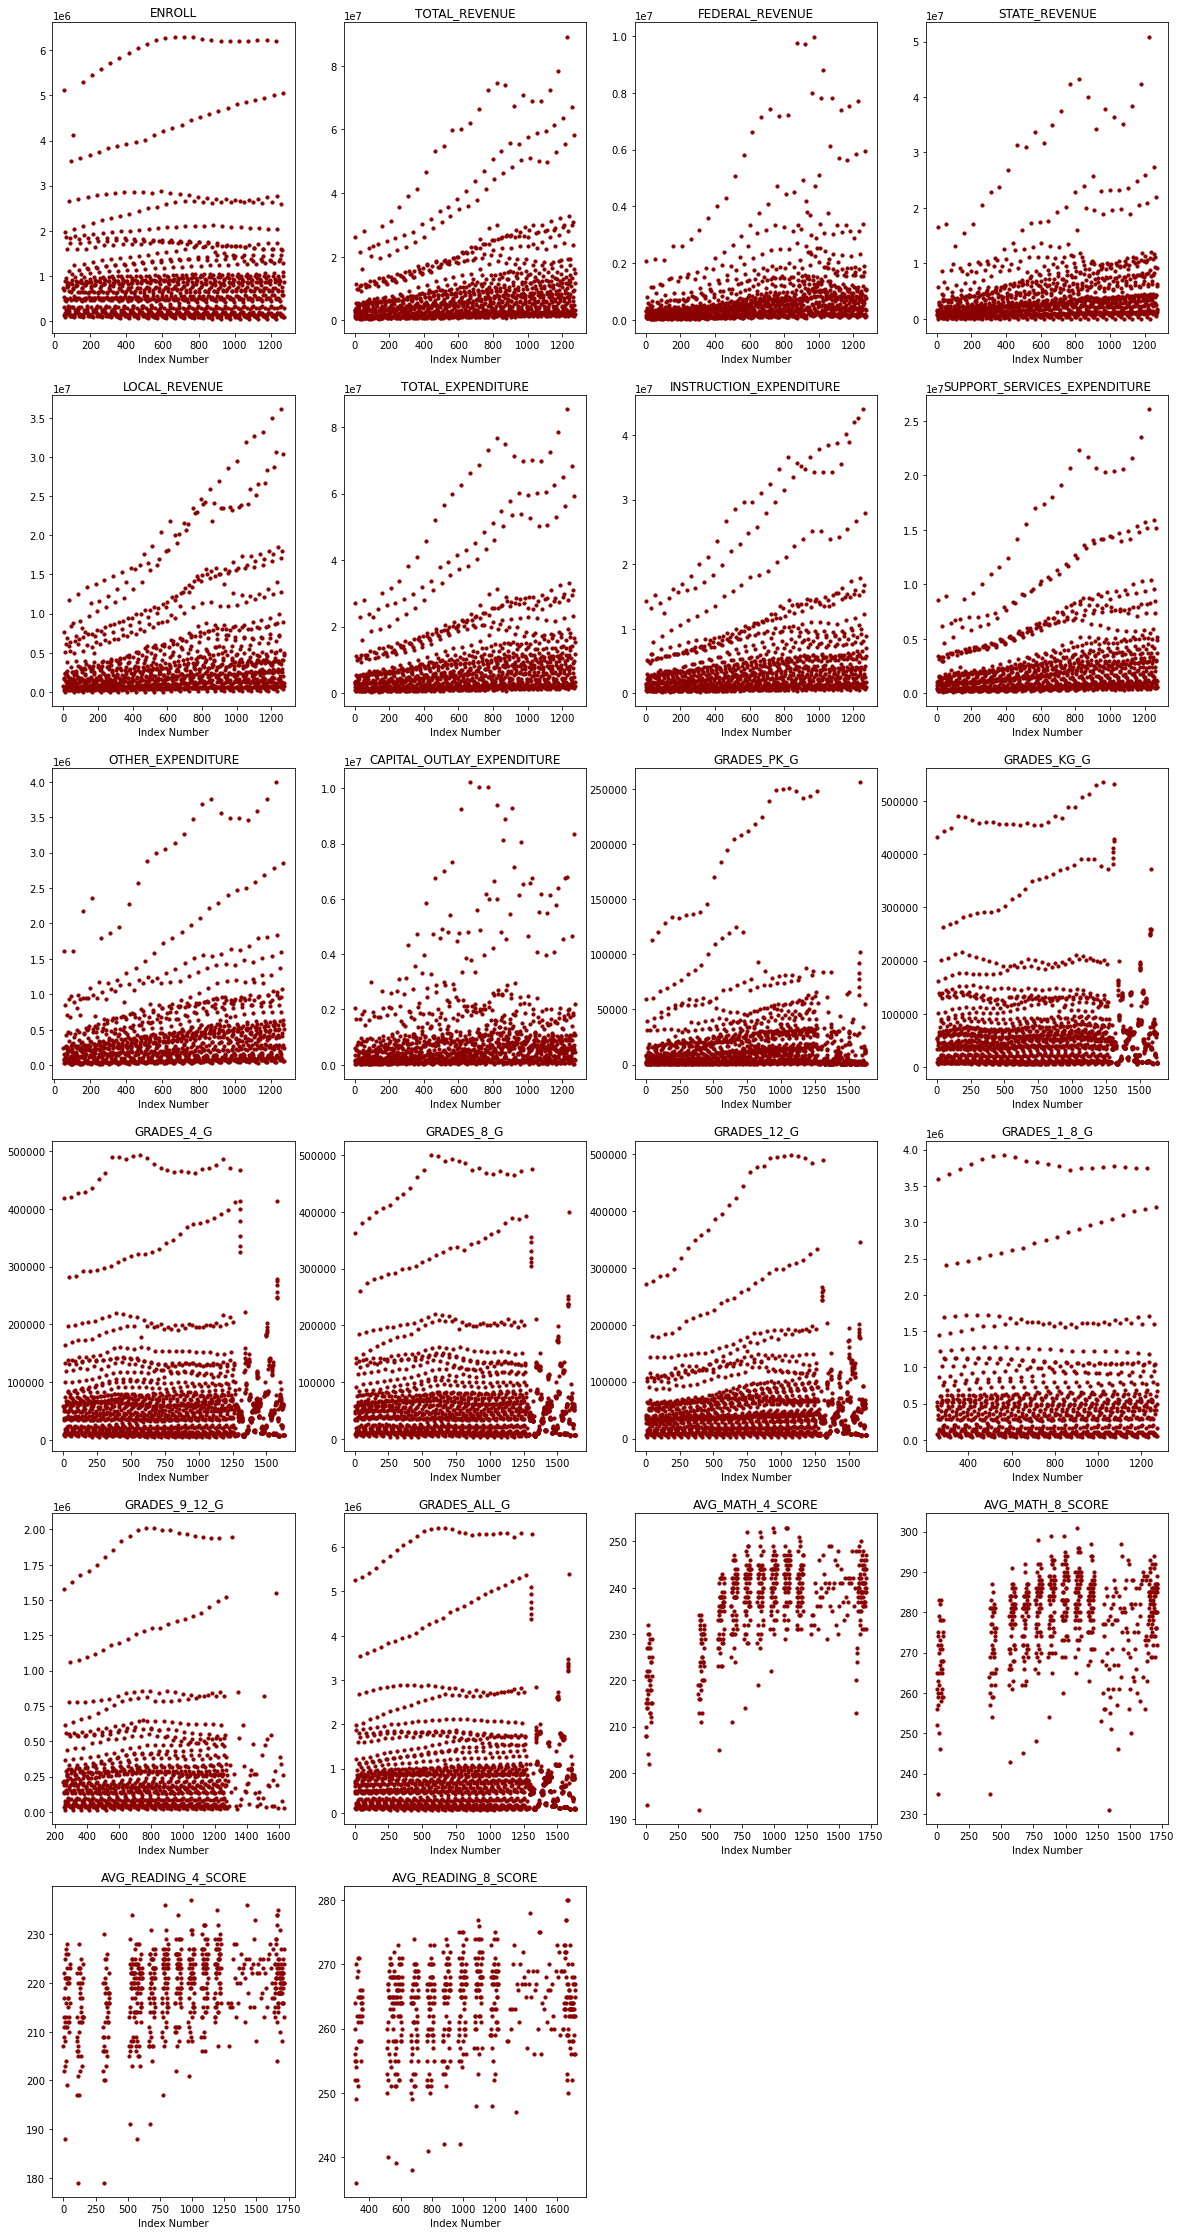

In [450]:
# Scatter ile denenen grafik
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.scatter(x = education.index,
                y = education[education.columns[i]],
                color = "darkred",
                s=10)
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

Yukarıdaki grafikleri incelediğimizde, bazı veri noktalarının belli bir modeli takip ettiğini, bazı değerlerinse sıralı olmadığını görüyoruz. Sıralı modellerde, merkezi eğilim ölçüleri doğrultusunda ortalama veya enterpolasyon alarak boş veriler doldurulabilir. Kimi değişkenlerde ise "null" yüzdeleri çok yüksek olduğu için, boş yerlere bu sayıda veri doldurmamız mümkün değildir. Ayrıca YEAR sütununu es geçtiğimiz için, verileri yorumlamak ve kategorize etmek çok zorlaşmıştır.

### Soru 3:
Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

In [451]:
education.YEAR.unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019],
      dtype=int64)

In [452]:
for i in education.columns[3:]:
    for j in education.YEAR.unique():
        fill_with = education[i][education.YEAR==j].mean()
        education[i][education.YEAR==j] = education[i][education.YEAR==j].fillna(fill_with, inplace=False)
        ## burada inplace'i True yapınca hiçbir şey değişmiyor. dolayısıyla False yapıp tekrardan o sütuna eşitlemem gerekti.
        ## ders notlarında, youtube["video_sayisi"].fillna(youtube["video_sayisi"].mean(), inplace=True)  yapınca işe yaramış, sütunları değiştirmişti.

In [453]:
print("The \"null\" percentages of the columns:")
round(education.isnull().sum()*100 / education.shape[0], 2)

# Aşağıda görülebileceği gibi, bazı "null" değerler doldurulmuş, yüzdeler düşmüştür.
# Fakat tamamı boş olan yıllar doldurulamamıştır.

The "null" percentages of the columns:


PRIMARY_KEY                      0.00
STATE                            0.00
YEAR                             0.00
ENROLL                          27.23
TOTAL_REVENUE                   24.14
FEDERAL_REVENUE                 24.14
STATE_REVENUE                   24.14
LOCAL_REVENUE                   24.14
TOTAL_EXPENDITURE               24.14
INSTRUCTION_EXPENDITURE         24.14
SUPPORT_SERVICES_EXPENDITURE    24.14
OTHER_EXPENDITURE               27.23
CAPITAL_OUTLAY_EXPENDITURE      24.14
GRADES_PK_G                      3.09
GRADES_KG_G                      3.09
GRADES_4_G                       3.09
GRADES_8_G                       3.09
GRADES_12_G                      3.09
GRADES_1_8_G                    39.36
GRADES_9_12_G                   36.27
GRADES_ALL_G                     3.09
AVG_MATH_4_SCORE                59.83
AVG_MATH_8_SCORE                59.83
AVG_READING_4_SCORE             56.73
AVG_READING_8_SCORE             59.83
dtype: float64

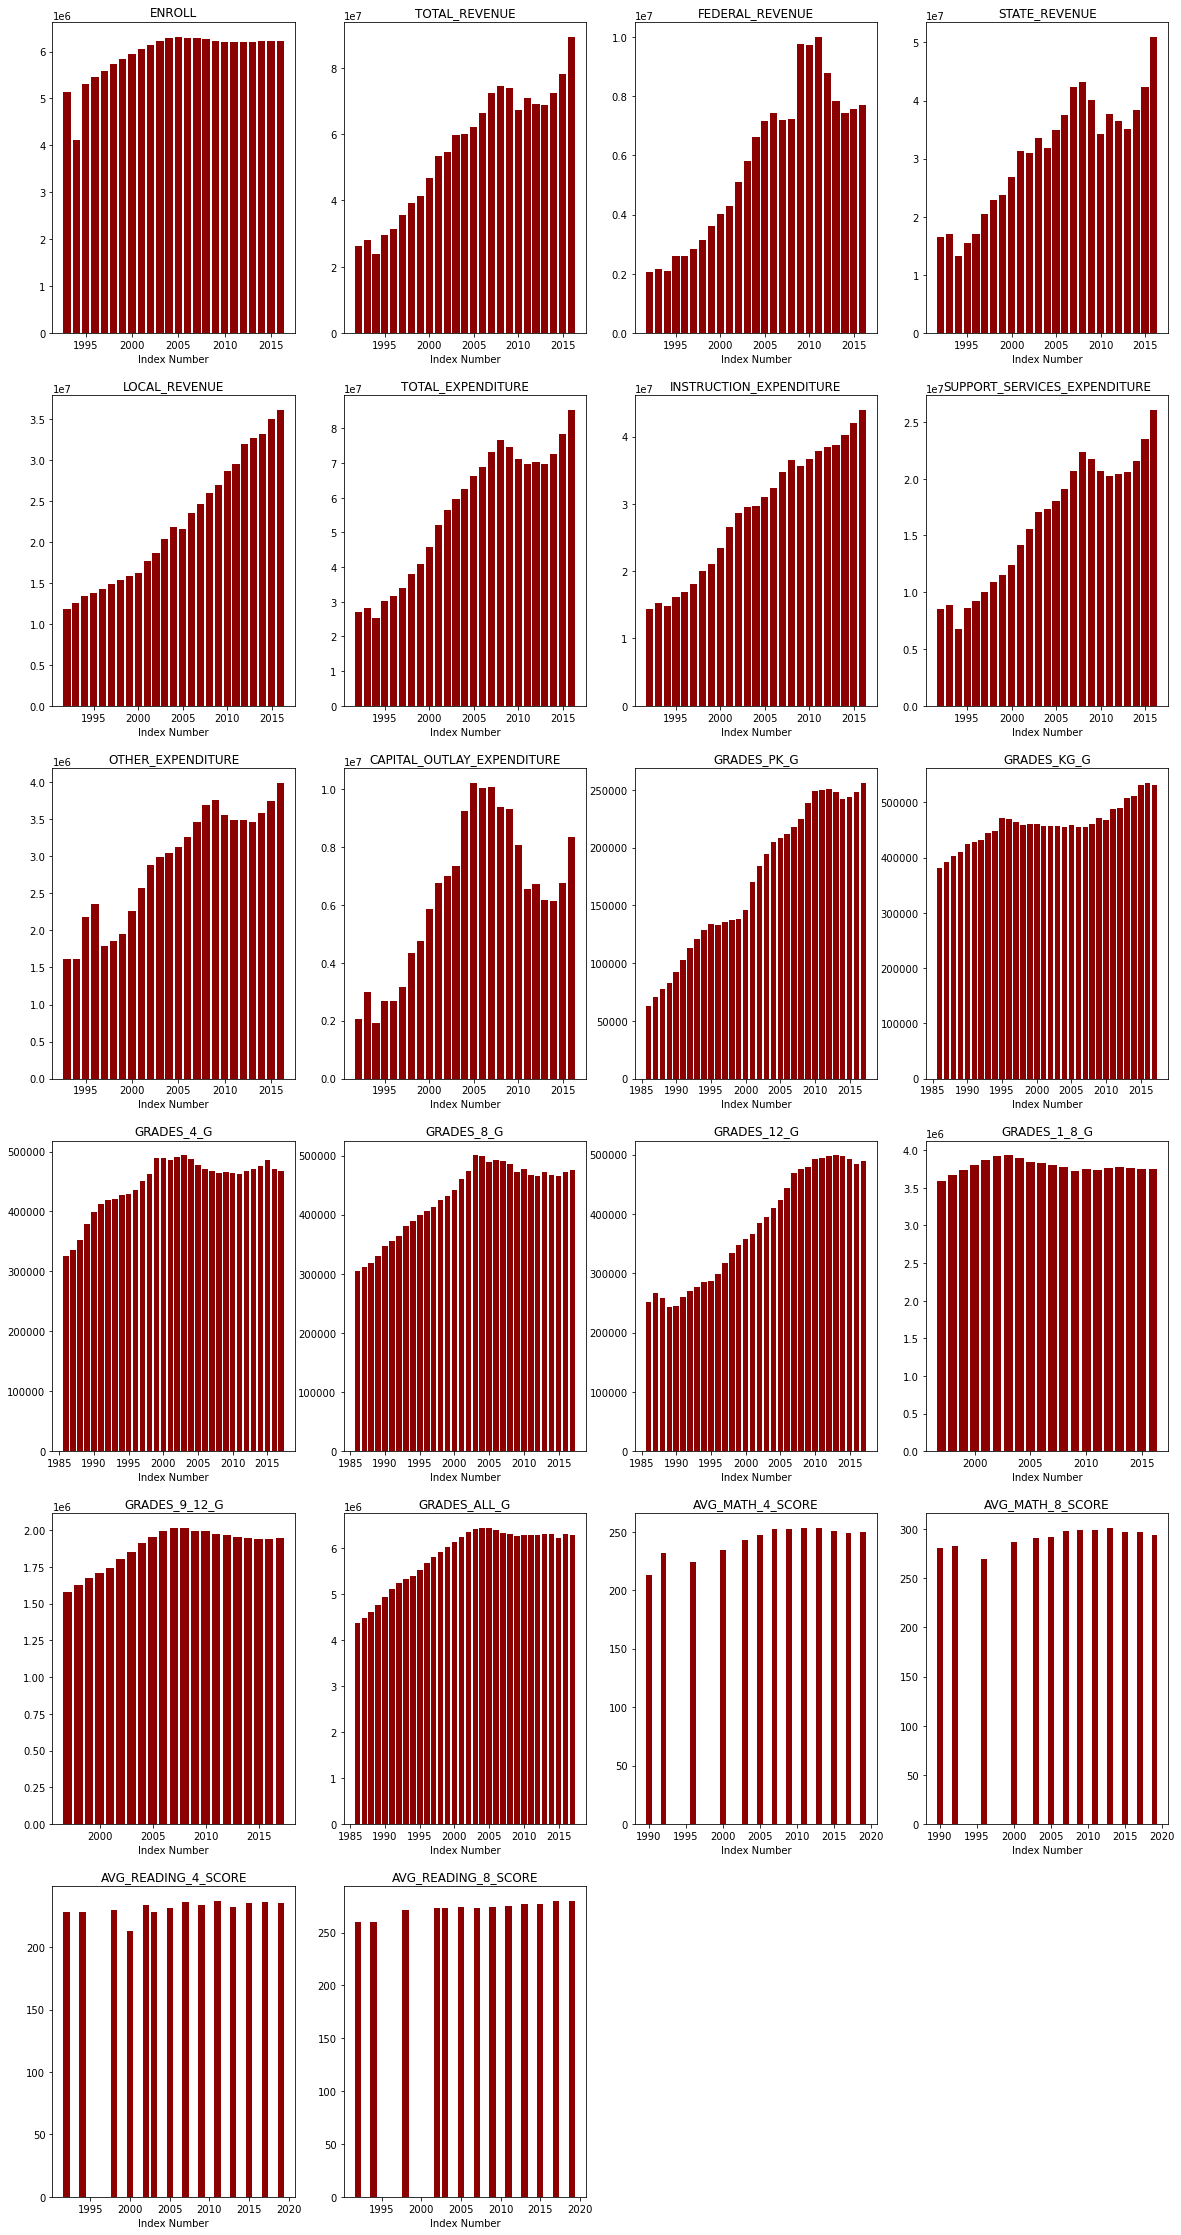

In [454]:
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.bar(x = education.YEAR,
            height = education[education.columns[i]],
            color = "darkred")
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

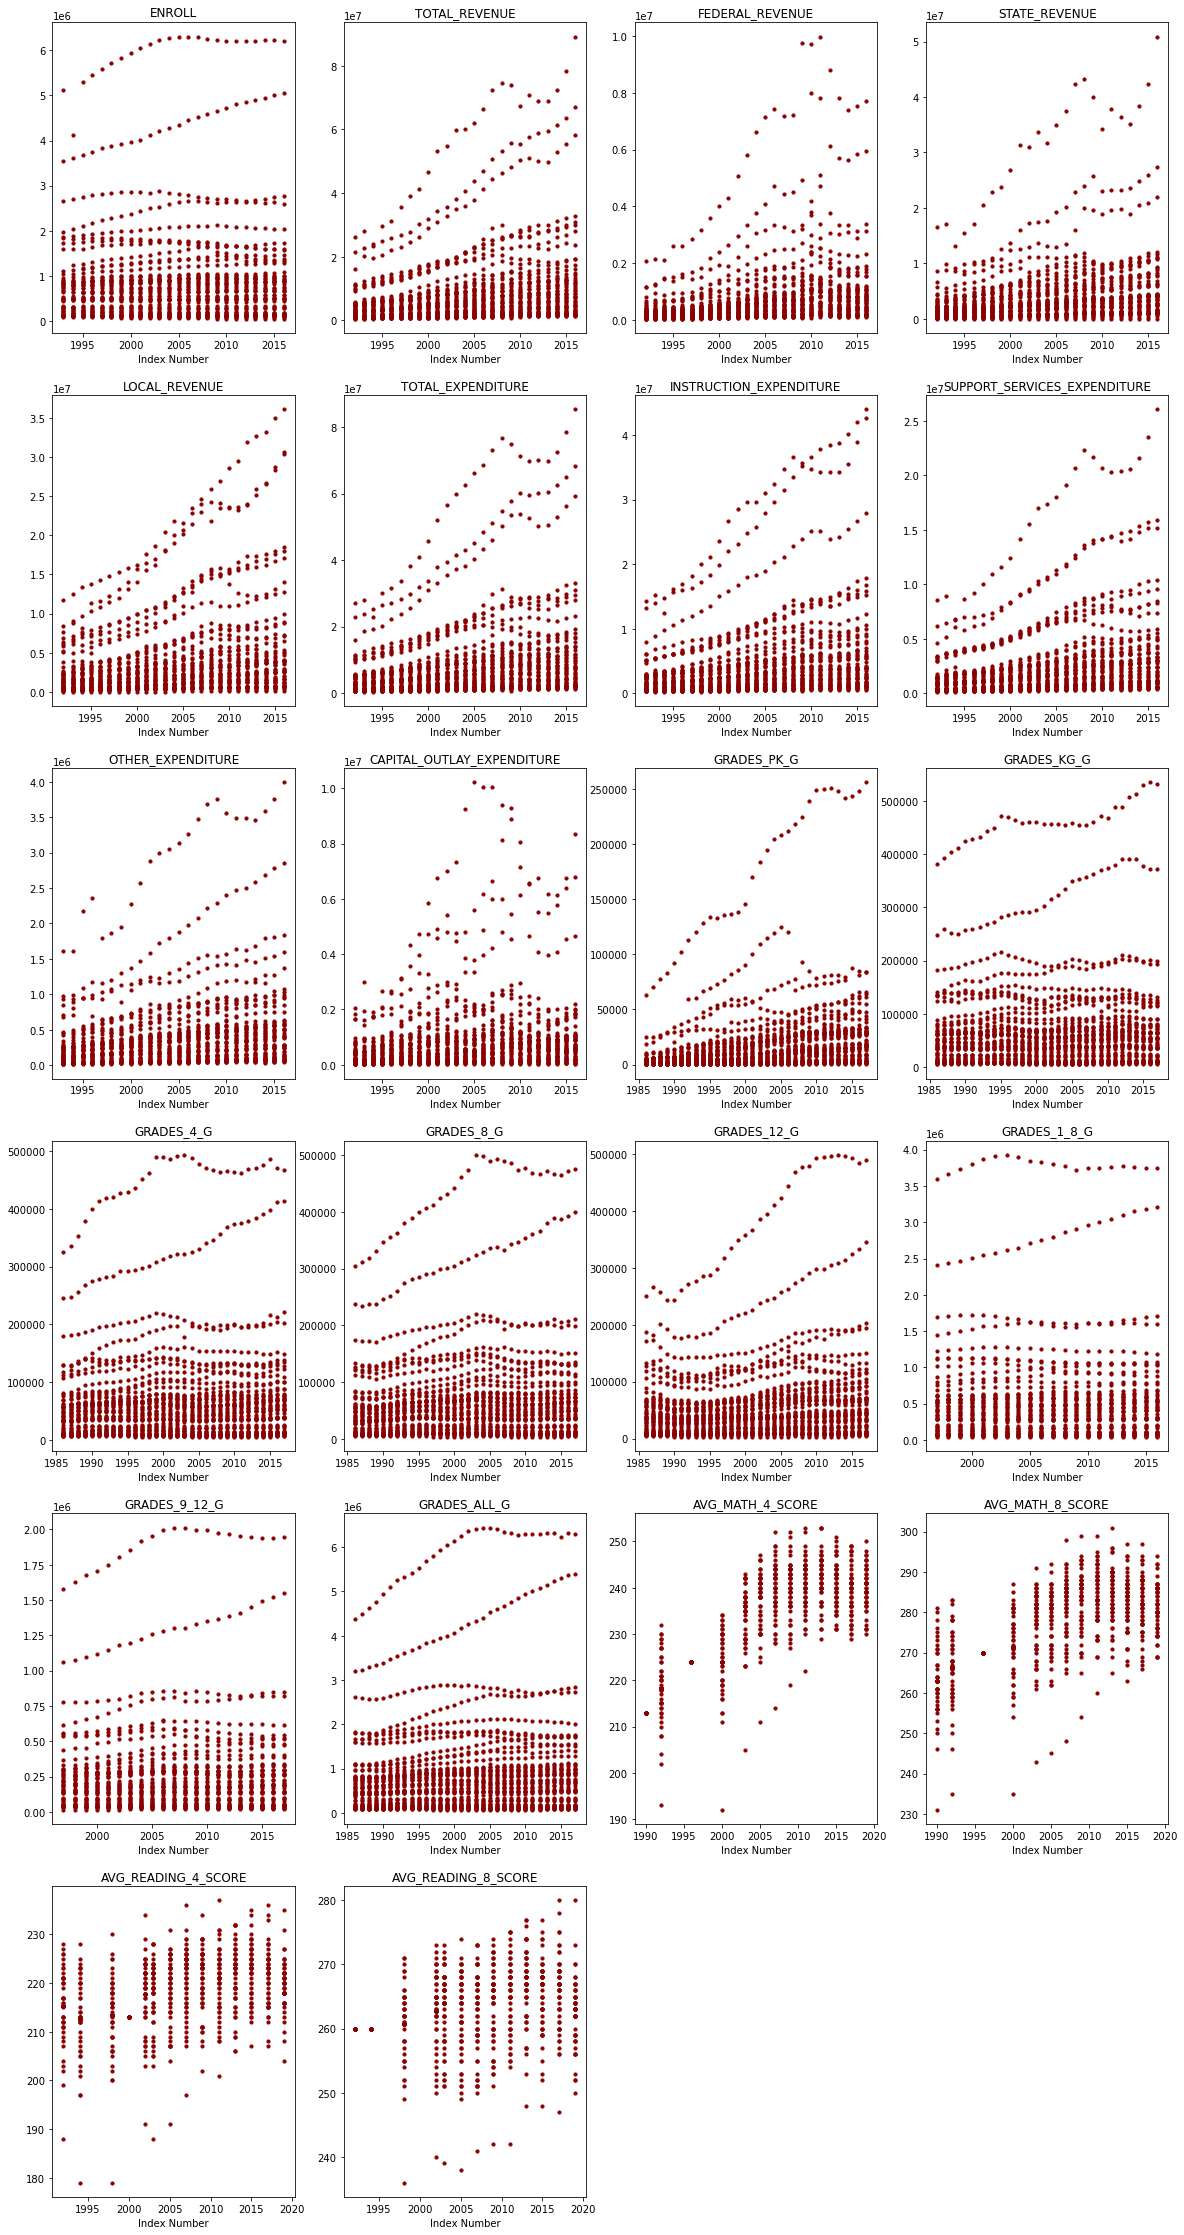

In [455]:
# Scatter ile denenen grafik
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.scatter(x = education.YEAR,
                y = education[education.columns[i]],
                color = "darkred",
                s=10)
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

In [456]:
# Aşağıda görülebileceği üzere, bazı değişkenler yer yer NaN değerleri barındırmaktadır. 
education.iloc[45:55,-4:]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
45,218.418605,266.325581,215.372093,260.0
46,221.000000,268.000000,221.000000,260.0
47,218.418605,266.325581,215.372093,260.0
48,215.000000,259.000000,216.000000,260.0
49,229.000000,278.000000,224.000000,260.0
50,225.000000,275.000000,223.000000,260.0
51,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN


### Soru 4:
Bu sefer, eksik değerleri [enterpolasyon](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) yaparak doldurun.

In [457]:
education = pd.read_csv("states_all.csv")

In [458]:
for i in education.columns[3:]:
    for j in education.YEAR.unique():
        fill_with = education[i][education.YEAR==j].interpolate(method="linear")
        education[i][education.YEAR==j] = education[i][education.YEAR==j].fillna(fill_with, inplace=False)

In [459]:
print("The \"null\" percentages of the columns:")
round(education.isnull().sum()*100 / education.shape[0], 2)

# Yine, aşağıda görülebileceği gibi, bazı "null" değerler doldurulmuş, yüzdeler düşmüştür fakat Soru 2'de yaptığımız fakat mean() uygulaması kadar düşmemiştir.
# Tamamı boş olan yıllar doldurulamamıştır.

The "null" percentages of the columns:


PRIMARY_KEY                      0.00
STATE                            0.00
YEAR                             0.00
ENROLL                          27.23
TOTAL_REVENUE                   24.14
FEDERAL_REVENUE                 24.14
STATE_REVENUE                   24.14
LOCAL_REVENUE                   24.14
TOTAL_EXPENDITURE               24.14
INSTRUCTION_EXPENDITURE         24.14
SUPPORT_SERVICES_EXPENDITURE    24.14
OTHER_EXPENDITURE               27.23
CAPITAL_OUTLAY_EXPENDITURE      24.14
GRADES_PK_G                      3.67
GRADES_KG_G                      3.09
GRADES_4_G                       3.09
GRADES_8_G                       3.09
GRADES_12_G                      3.09
GRADES_1_8_G                    39.36
GRADES_9_12_G                   36.27
GRADES_ALL_G                     3.09
AVG_MATH_4_SCORE                65.89
AVG_MATH_8_SCORE                62.86
AVG_READING_4_SCORE             59.77
AVG_READING_8_SCORE             65.89
dtype: float64

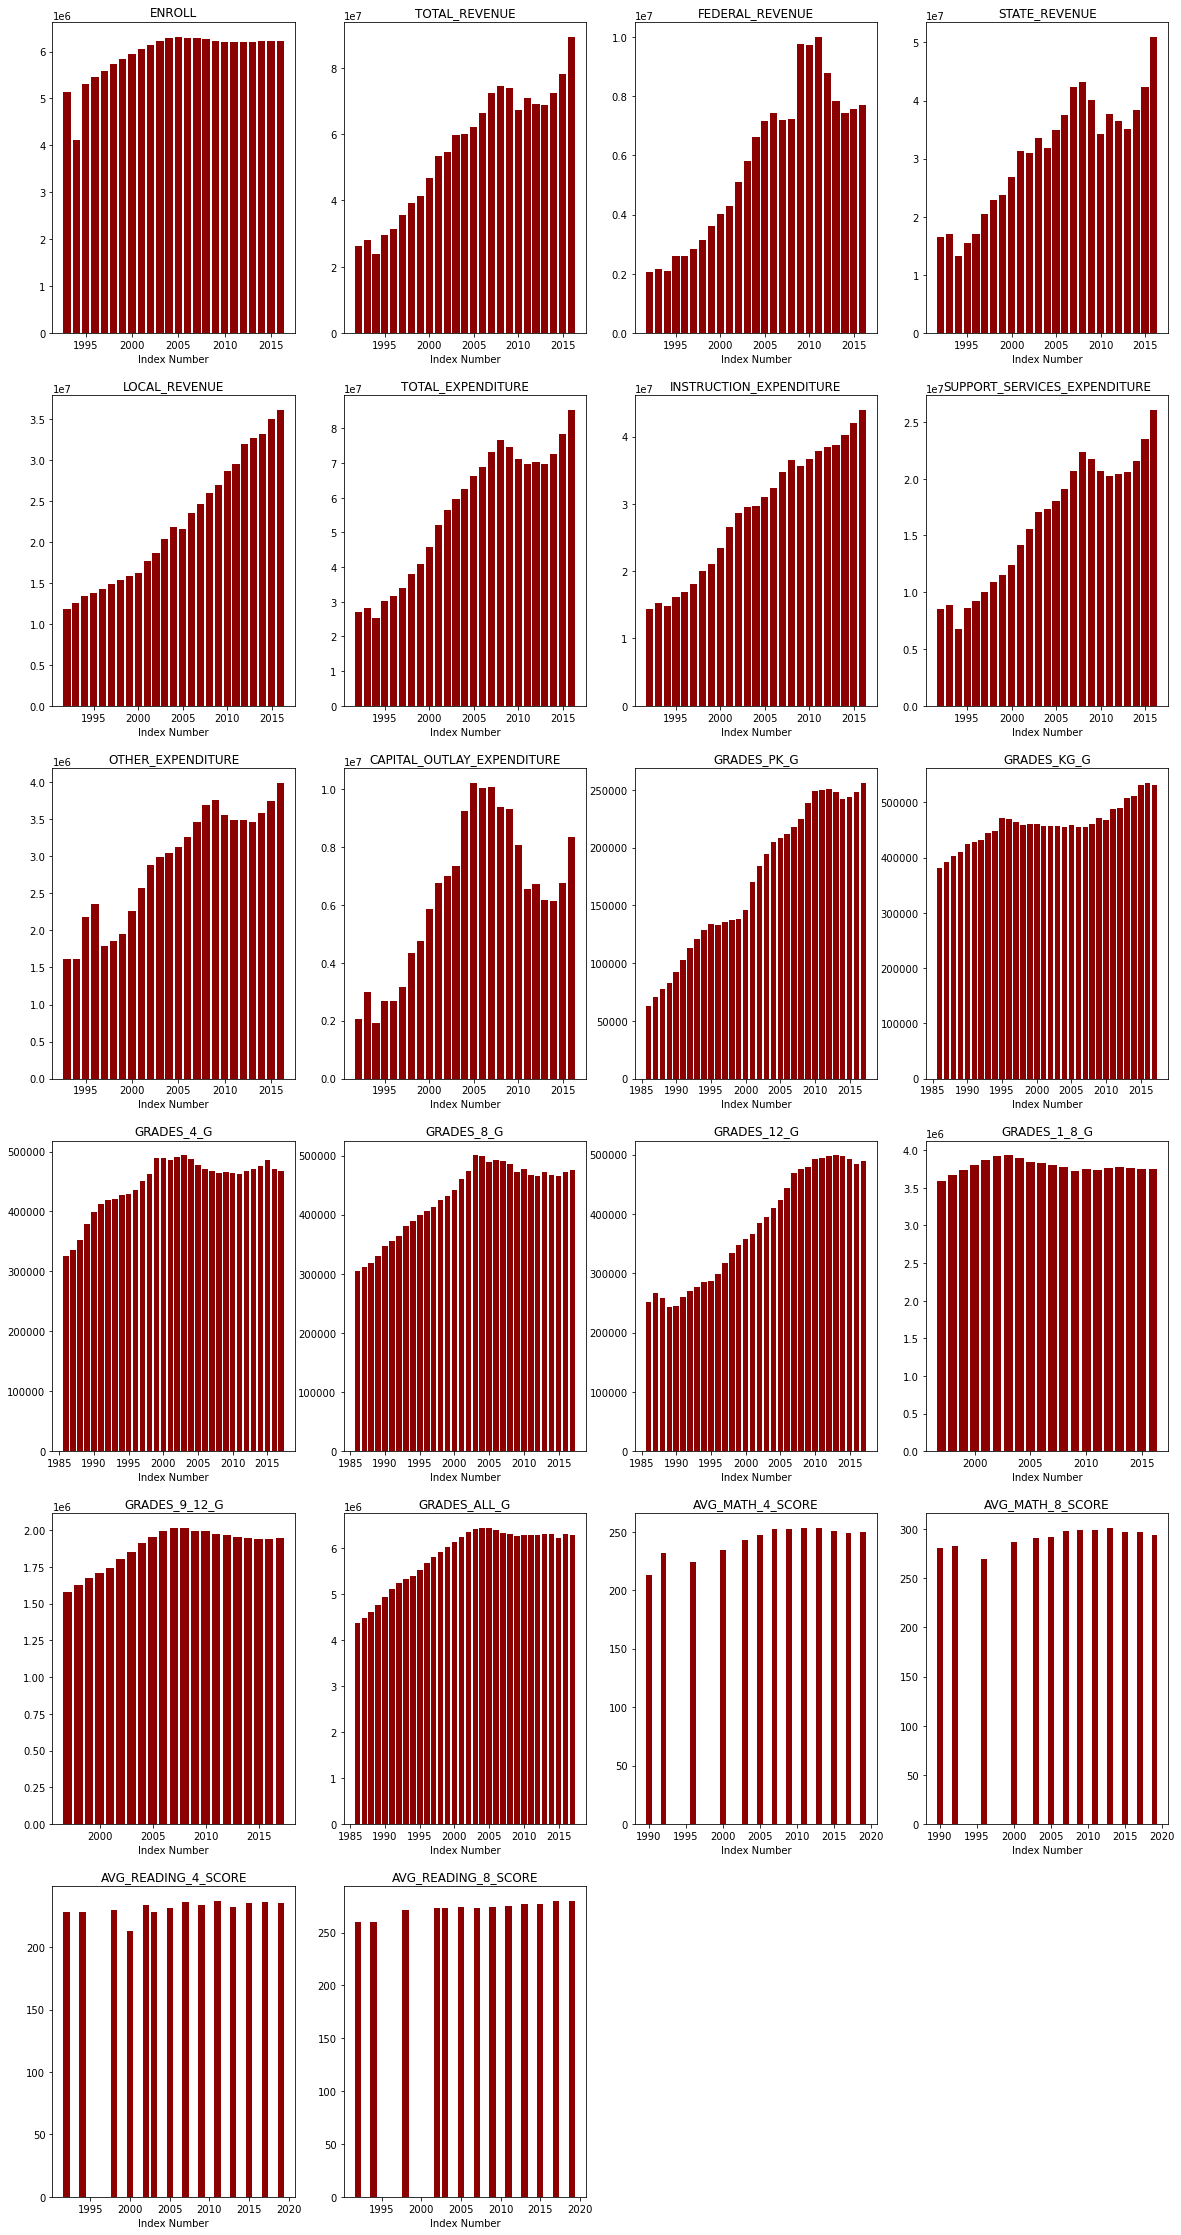

In [460]:
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.bar(x = education.YEAR,
            height = education[education.columns[i]],
            color = "darkred")
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

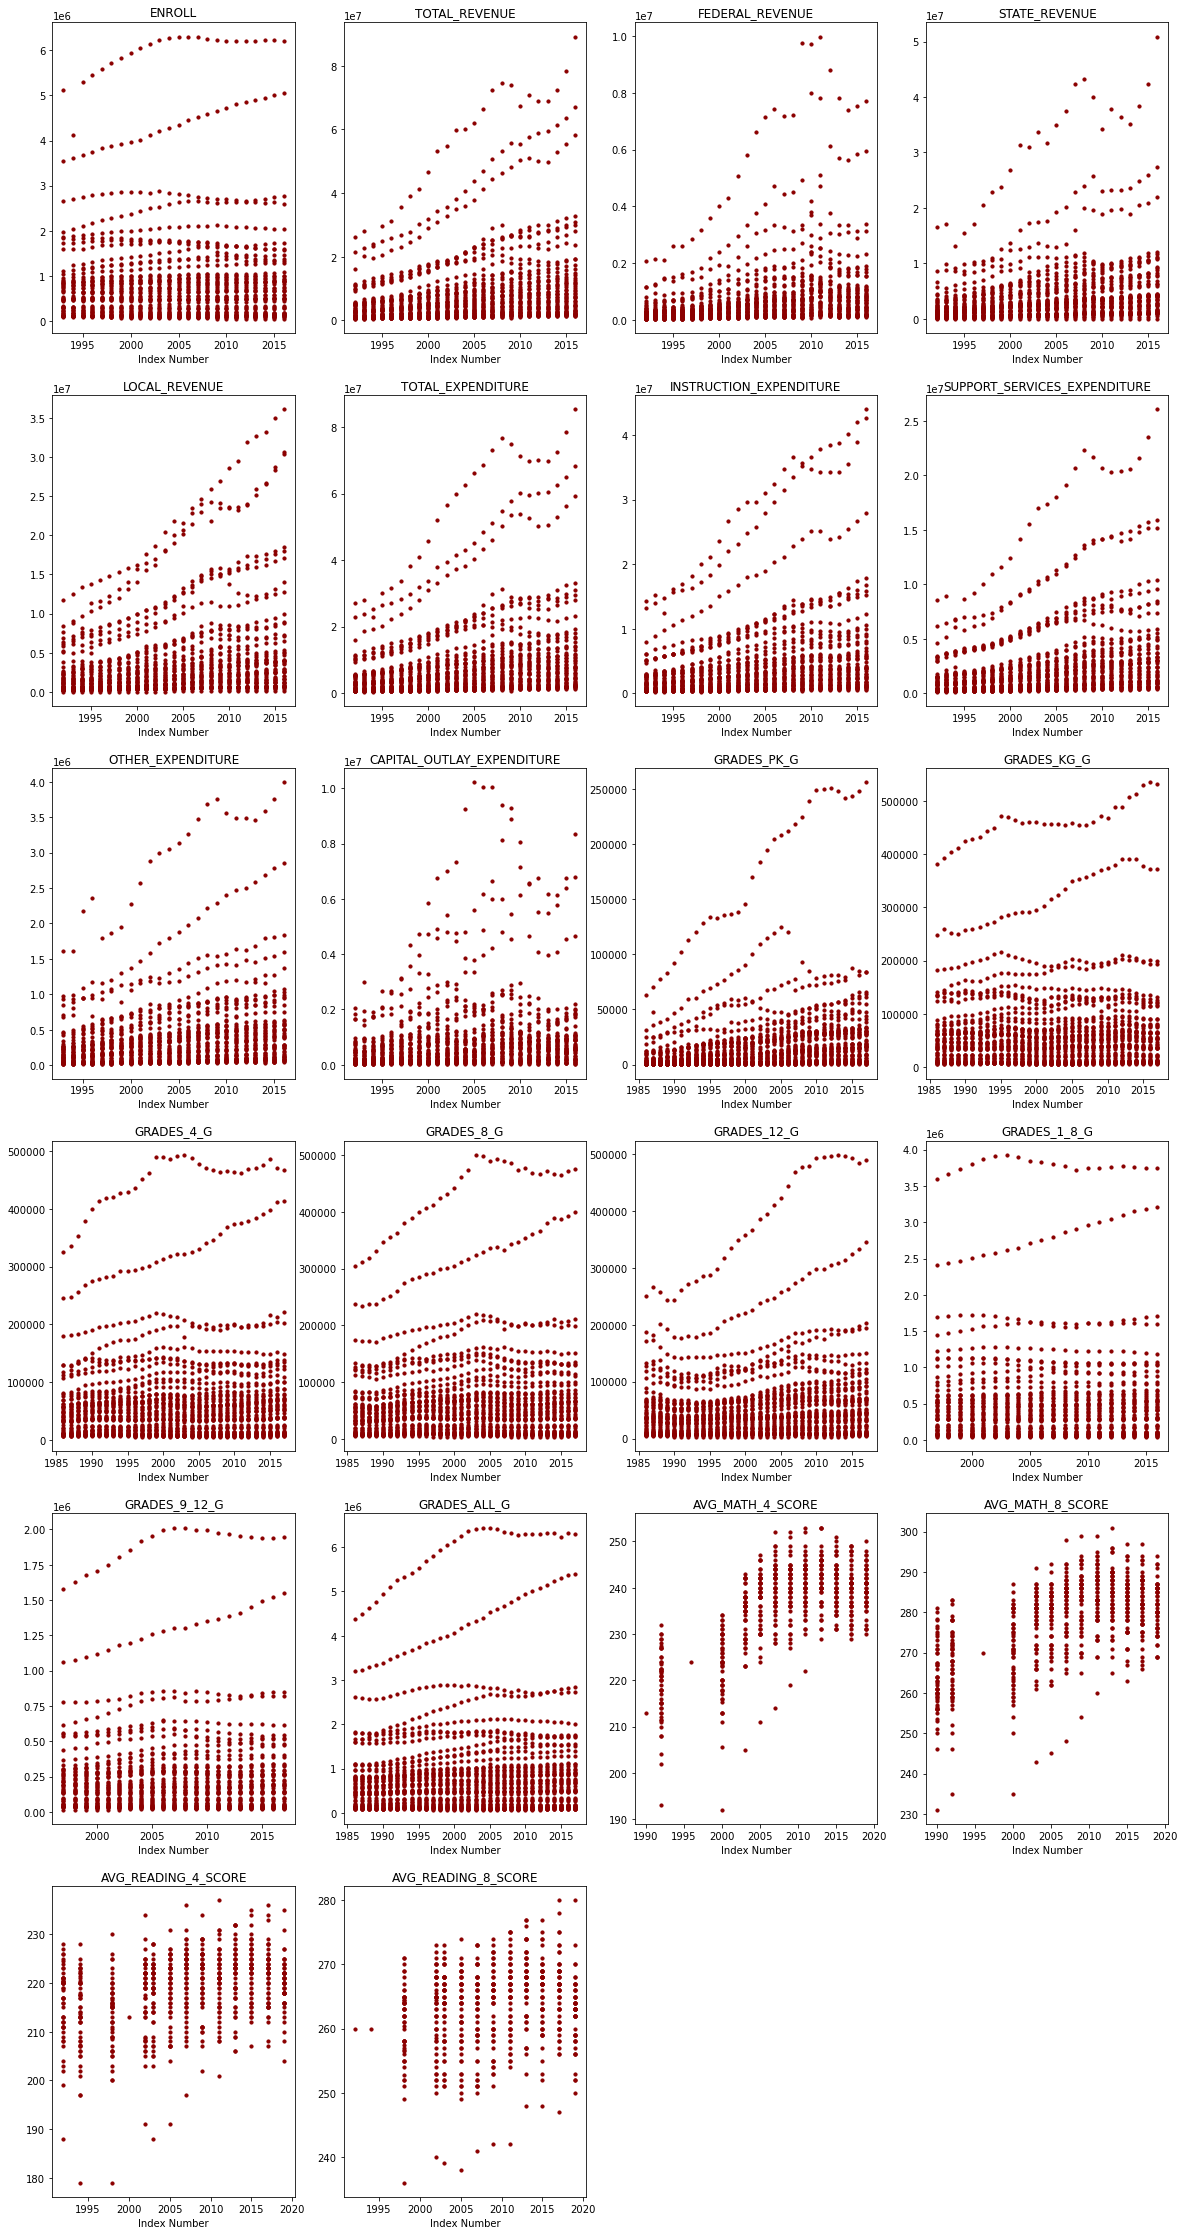

In [461]:
# Scatter ile denenen grafik
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.scatter(x = education.YEAR,
                y = education[education.columns[i]],
                color = "darkred",
                s=10)
    plt.xlabel("Index Number")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

### Soru 5: 
İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz? <br>

**Cevap:** <br>
2\. soruda, YEAR değişkeni alınmadığı için verileri kategorize etmek ve anlamlandırmak çok zor olmuştur. 3. soruda eksik veriler, ortalama alınarak hesaplanmış ve scatter grafikten görülebileceği üzere bazı değişkenlerde mantıklı şekilde doldurulmuş, bazı değişkenler ise alakasız bir trend sergilemiştir. 4. soruda yapılan enterpolasyon, sıralı veriler için daha mantıklı sonuçlar vermiştir. <br> Bar grafiklerde değişimler çok düşük olduğu için gözlem zor olmuştur.

\## Buradaki değişkenler çok karışık geldi. Daha iyi yorumlayabilmek adına üzerine ayrıntılı konuşulabilir. <br>
\## Grafiklerden pek bir şey okuyamadım. Scatter'i kullandığımda bazı veri noktalarının değiştiğini görebildim yalnızca.